# Business Information

In [33]:
import pandas as pd
import numpy as np
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
# read the data to a dataframe
df1 = pd.read_csv('data/mergedData022522clean.csv')
df2 = pd.read_csv('data/mergedData033122clean.csv')
df3 = pd.read_csv('data/mergedData041022clean.csv')

In [12]:
# create a price column by dividing price amount by price divisor (not sure why ETSY splits this up)
df1['price'] = df1['price.amount']/df1['price.divisor']
df2['price'] = df2['price.amount']/df2['price.divisor']
df3['price'] = df3['price.amount']/df3['price.divisor']

## Dates the data covers

In [13]:
# date range of a dataframe
def date_range(df):
    first = df["creation_timestamp"].min()
    last = df["creation_timestamp"].max()
    print(datetime.date.fromtimestamp(first), 'to', datetime.date.fromtimestamp(last))

In [14]:
date_range(df1)
date_range(df2)
date_range(df3)

2022-02-07 to 2022-02-25
2022-03-14 to 2022-03-31
2022-03-23 to 2022-04-10


### Identify top products listed

In [15]:
# I used the top tags and title word counts in the Text Analysis section to manually identify common product types:
products = [
'mug', 
    'cup', 
'plate', 
'vase', 
'bowl', 
'tea cup', 
'dinnerware set', 
'soap dish', 
'utensil holder', 
'candle holder',
'ring holder',
'serving bowl', 
'jar', 
'spoon rest', 
'planter',
'pendant',
'jug',
'soap dispenser',
'tumbler'   
]

### Average Prices for Top Products in US Dollars

In [16]:
# dataframes with listings that have prices in US Dollars
usd1 = df1[df1['price.currency_code'] == "USD"].reset_index(drop=True)
usd2 = df2[df2['price.currency_code'] == "USD"].reset_index(drop=True)
usd3 = df3[df3['price.currency_code'] == "USD"].reset_index(drop=True)

In [17]:
# this function adds a column for each item in the products list and assigns the value 1 if the product appears in the tags
def add_product_columns(dataframe, list):
    for p in list:
        dataframe[p] = pd.Series(dtype='int')
        for i in range (0, len(dataframe)):
            if ((p in dataframe['tags'][i]) == True):
                dataframe[p][i] = 1

In [18]:
# use the function to add the columns
add_product_columns(usd1, products)
add_product_columns(usd2, products)
add_product_columns(usd3, products)

<ipython-input-17-ea799e53fde6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[p][i] = 1


In [19]:
# use the function to add the columns
add_product_columns(df1, products)
add_product_columns(df2, products)
add_product_columns(df3, products)

<ipython-input-17-ea799e53fde6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[p][i] = 1


In [20]:
# this function calculates the average price for each product in the list
def calculate_product_avg(dataframe, prods):  
    average_prices = [] 
    for i in range(0, len(prods)):
        p = prods[i]
        df = dataframe[dataframe[p] == 1]
        avg = df['price'].mean()
        average_prices.append(avg)
    return average_prices

In [21]:
avg_prices_usd1 = calculate_product_avg(usd1, products)
avg_prices_usd2 = calculate_product_avg(usd2, products)
avg_prices_usd3 = calculate_product_avg(usd3, products)

In [26]:
# create empty dataframe for average prices
average_prices_df = pd.DataFrame(columns = products)

In [27]:
average_prices_df.loc[len(average_prices_df)] = avg_prices_usd1
average_prices_df.loc[len(average_prices_df)] = avg_prices_usd2
average_prices_df.loc[len(average_prices_df)] = avg_prices_usd3

In [28]:
average_prices_df

,mug,cup,plate,vase,bowl,tea cup,dinnerware set,soap dish,utensil holder,candle holder,ring holder,serving bowl,jar,spoon rest,planter,pendant,jug,soap dispenser,tumbler
0,41.186386,39.851983,93.173459,67.651238,67.126415,39.562961,243.736923,24.086897,43.953125,34.533226,29.575385,72.850696,65.549196,20.645669,42.507099,30.897656,47.727627,38.032500,33.993988
1,41.611503,40.502263,69.610158,72.236383,61.521238,42.247560,137.076809,27.956386,56.066923,40.610909,27.384583,73.489950,67.175242,22.241500,40.498852,18.051875,45.615970,31.740417,38.876074
2,42.024441,42.047080,72.586576,67.167079,65.485365,44.225438,144.104468,27.671368,56.263333,37.096923,28.314444,82.741036,76.859959,22.844899,43.473366,18.675397,126.598113,31.572553,39.234161


In [29]:
# Average Price for all the listings in USD
usd1['price'].mean()

56.87491080348218

In [30]:
mugs = usd3[usd3["mug"] == 1]

<AxesSubplot:xlabel='price', ylabel='Count'>

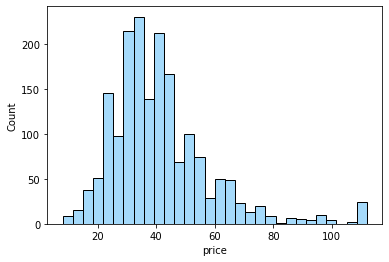

In [37]:
sns.histplot(data=np.clip(mugs['price'],0,mugs['price'].quantile(.99)), bins = 30, color = 'lightskyblue')

### Product Percentages

In [20]:
# this function calculates the percentage each product represents of the total listings
def calculate_product_percent(dataframe, prods):  
    product_percents = [] 
    for i in range(0, len(prods)):
        p = prods[i]
        df = dataframe[dataframe[p] == 1]
        percent = "{:.2%}".format(len(df)/len(dataframe))
        product_percents.append(percent)
    return product_percents

In [21]:
# create empty dataframe for product percentages
product_percents = pd.DataFrame(columns = products)

In [22]:
# calcuate the product percentages for each dataset
product_percent_df1 = calculate_product_percent(df1, products)
product_percent_df2 = calculate_product_percent(df2, products)
product_percent_df3 = calculate_product_percent(df3, products)

In [23]:
# add the product percents to the dataframe
product_percents.loc[len(product_percents)] = product_percent_df1
product_percents.loc[len(product_percents)] = product_percent_df2
product_percents.loc[len(product_percents)] = product_percent_df3
product_percents

,mug,cup,plate,vase,bowl,tea cup,dinnerware set,soap dish,utensil holder,candle holder,ring holder,serving bowl,jar,spoon rest,planter,pendant,jug,soap dispenser,tumbler
0,24.56%,19.01%,7.24%,7.82%,15.94%,5.14%,1.04%,1.03%,0.62%,0.71%,0.20%,2.06%,2.49%,1.42%,3.35%,0.69%,1.59%,0.26%,2.50%
1,23.63%,18.63%,6.12%,7.98%,15.47%,5.43%,0.58%,1.37%,0.75%,0.76%,0.33%,2.43%,3.56%,1.34%,3.47%,0.81%,1.80%,0.46%,2.53%
2,24.39%,18.95%,6.46%,7.81%,15.01%,5.15%,0.61%,1.47%,0.44%,0.96%,0.28%,2.19%,3.14%,1.64%,2.55%,0.85%,1.53%,0.48%,2.59%


In [24]:
# create a new dataframe for the listings that have at least 20 favorers
twenty_favorers_df1 = df1[df1['num_favorers_listing'] >= 20]
twenty_favorers_df2 = df2[df2['num_favorers_listing'] >= 20]
twenty_favorers_df3 = df3[df3['num_favorers_listing'] >= 20]

In [25]:
# calcuate the product percentages for the listings that have at least 20 favorers
product_percent_twenty_df1 = calculate_product_percent(twenty_favorers_df1, products)
product_percent_twenty_df2 = calculate_product_percent(twenty_favorers_df2, products)
product_percent_twenty_df3 = calculate_product_percent(twenty_favorers_df3, products)

In [26]:
# create empty dataframe for product percentages
product_percents_twenty_favorers = pd.DataFrame(columns = products)

In [27]:
#add the percentages to the new dataframe
product_percents_twenty_favorers.loc[len(product_percents_twenty_favorers)] = product_percent_twenty_df1
product_percents_twenty_favorers.loc[len(product_percents_twenty_favorers)] = product_percent_twenty_df2
product_percents_twenty_favorers.loc[len(product_percents_twenty_favorers)] = product_percent_twenty_df3

In [28]:
product_percents_twenty_favorers

,mug,cup,plate,vase,bowl,tea cup,dinnerware set,soap dish,utensil holder,candle holder,ring holder,serving bowl,jar,spoon rest,planter,pendant,jug,soap dispenser,tumbler
0,28.25%,22.59%,10.20%,4.21%,16.81%,6.75%,2.25%,1.60%,0.69%,0.40%,0.36%,2.18%,2.51%,2.21%,2.11%,0.73%,1.02%,0.29%,2.54%
1,27.78%,20.95%,8.34%,5.18%,16.57%,6.54%,1.58%,1.54%,0.81%,0.55%,0.44%,2.68%,3.64%,1.95%,2.21%,0.96%,1.58%,0.59%,3.20%
2,28.13%,21.21%,9.10%,3.68%,17.17%,6.07%,1.68%,1.79%,0.54%,0.57%,0.50%,3.11%,3.03%,2.25%,1.36%,0.89%,1.36%,0.64%,2.89%
